# SQL _(1h30)_

> 1. **Modèle de données:** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.

Schéma de la base de données :


Livre (LivreID, Titre, AuteurID)

Auteur (AuteurID, Nom, Prénom)

Genre (GenreID, Nom)

LivreGenre (LivreID, GenreID)

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

Réponse :


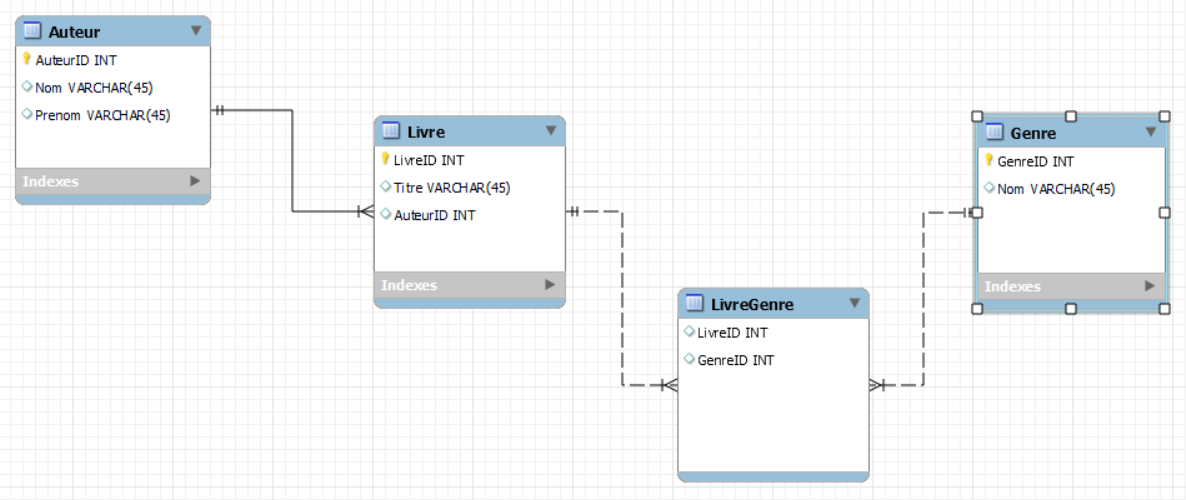

`Auteur` --- `Livre`. Clé primaire: `Auteur[AuteurID]` Clé étrangère: `Livre[AuteurID]`         
`Livre` --- `LivreGenre`. Clé primaire: `Livre[LivreID]` Clé étrangère: `LivreGenre[LivreID]`       
`Genre` --- `LivreGenre`. Clé primaire: `Genre[GenreID]` Clé étrangère: `LivreGenre[GenreID]`

> 2. Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiare ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



Réponse:


3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [47]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/MaskiVal/Html/raw/main/biblio_F.sqlite3.zip")

open('biblio_F.sqlite3.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("biblio_F.sqlite3.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('biblio_F.sqlite3')

Voici une représentation des valeurs de votre base de données :

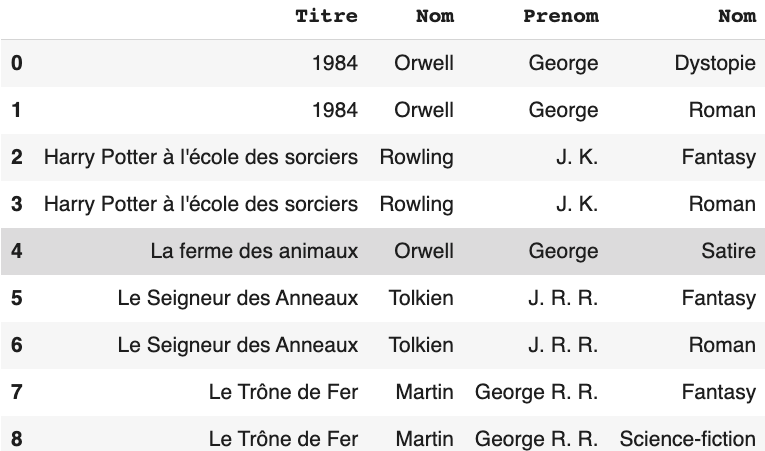

In [ ]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("""SELECT * FROM Auteur""", conn)

,AuteurID,Nom,Prenom
0,1,Martin,George R. R.
1,2,Rowling,J. K.
2,3,Tolkien,J. R. R.
3,4,Orwell,George


Effectuer des requêtes, pour répondre aux questions suivantes.

In [48]:
# AVANT D'EFFECTUER LES REQUETES DEMANDEES, JE CREE UNE FONCTION QUI VA ME PERMETTRE DE LES EXECUTER SIMPLEMENT

def fn_SQL_Query(query):

    return pd.read_sql(query, conn)

> 3.1 Renvoyer le nom du genre qui contient le plus de livres, ainsi que le nombre de livres pour ce genre.

Résultat attendu:  
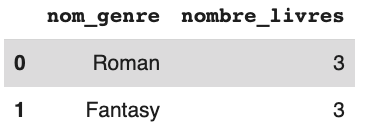

In [49]:
query = """ 

WITH subquery AS
        (
            SELECT
                g.Nom AS nom_genre,
                COUNT(lg.GenreID) AS nombre_livres
            FROM
                Genre AS g
            JOIN
                LivreGenre AS lg
                    ON g.GenreID = lg.GenreID
            GROUP BY
                nom_genre
            ORDER BY
                nombre_livres DESC
        ) 
SELECT 
    *
FROM 
    subquery
WHERE
    nombre_livres = (SELECT MAX(nombre_livres) FROM subquery)

"""

fn_SQL_Query(query)

,nom_genre,nombre_livres
0,Roman,3
1,Fantasy,3


> 3.2 Renvoyer le nombre de livres et d'auteurs par genre, dans l'ordre décroissant par rapport au nombre de livres.


Résultat attendu:
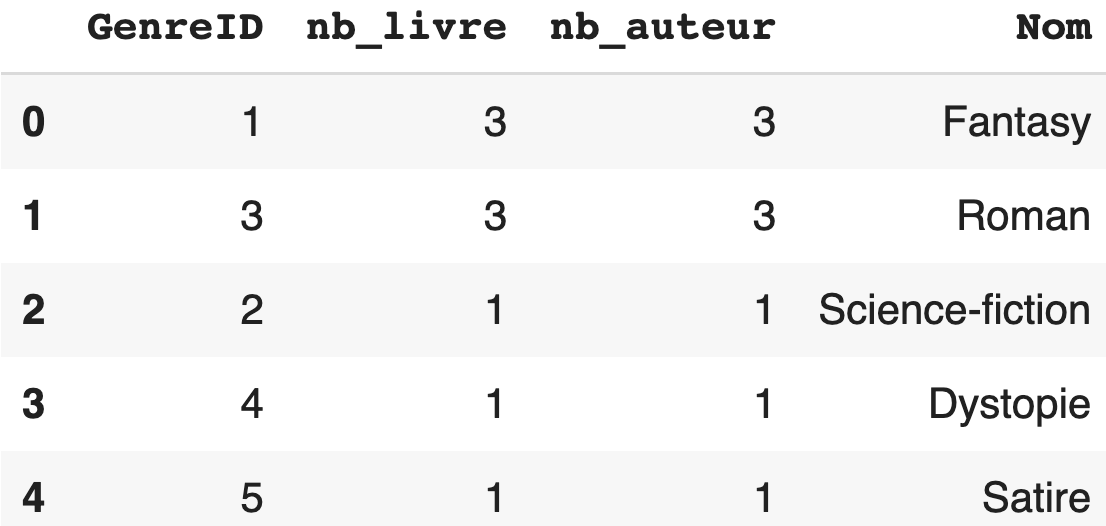

In [50]:
query = """ 

SELECT
    g.GenreID,
    COUNT(lg.GenreID) AS nb_livre,
    COUNT(a.AuteurID) AS nb_auteur,    
    g.Nom
FROM
    Genre AS g
JOIN
    LivreGenre AS lg
        ON g.GenreID = lg.GenreID
JOIN
    Livre AS l
        ON lg.LivreID = l.livreID
JOIN
    Auteur AS a
        ON l.AuteurID = a.AuteurID
GROUP BY
    g.Nom
ORDER BY
    nb_auteur DESC,
    g.GenreID
"""

fn_SQL_Query(query)

,GenreID,nb_livre,nb_auteur,Nom
0,1,3,3,Fantasy
1,3,3,3,Roman
2,2,1,1,Science-fiction
3,4,1,1,Dystopie
4,5,1,1,Satire


> 3.3 Créer une requête qui renvoie le nombre de genres distincts dans la table Genre.

Résultat attendu:

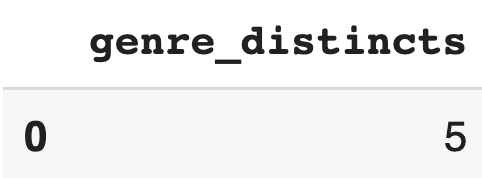

In [51]:
query = """ 

SELECT 
    COUNT(DISTINCT Nom) AS genre_distincts
FROM
    Genre

"""

fn_SQL_Query(query)

,genre_distincts
0,5


> 3.4. La bibliothèque souhaite investir dans les auteurs les plus populaires, basé sur le nombre de livres qu'ils ont écrits. Combien de livres a écrit l'auteur le plus prolifique ?

Résultat attendu:

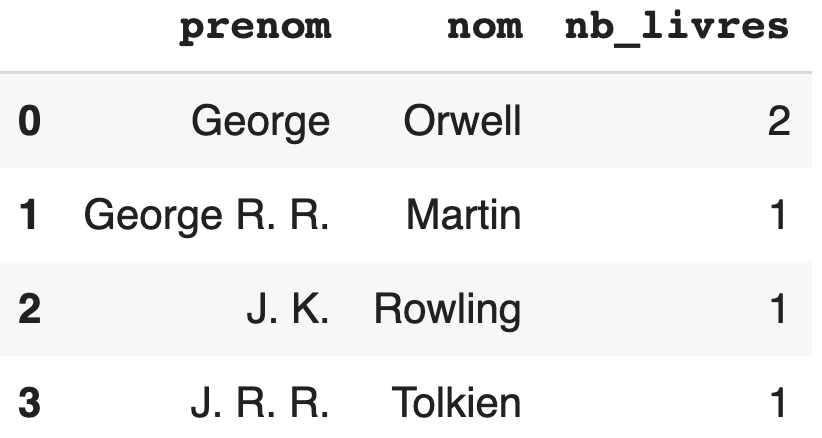

In [52]:
query = """ 

SELECT
    a.prenom AS prenom,
    a.nom AS nom,
    COUNT(l.livreID) AS nb_livres
FROM 
    Auteur AS a
JOIN
    Livre AS l
        ON a.AuteurID = l.AuteurID
GROUP BY 
    nom, prenom
ORDER BY
    nb_livres DESC

"""

fn_SQL_Query(query)

,prenom,nom,nb_livres
0,George,Orwell,2
1,George R. R.,Martin,1
2,J. K.,Rowling,1
3,J. R. R.,Tolkien,1


> 3.5 : Trouvez les auteurs qui ont écrit plus d'un livre dans plus d'un genre. Classez-les par ordre décroissant du nombre de livres distincts qu'ils ont écrits, puis par ordre décroissant du nombre de genres distincts dans lesquels ils ont écrit ?.

Résultat attendu:

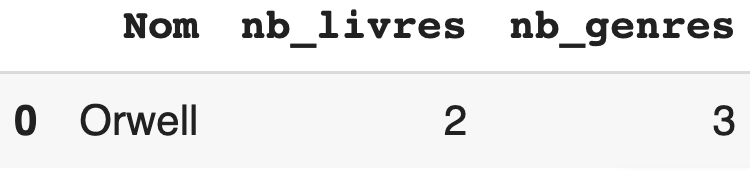

In [53]:
query = """ 

SELECT
    a.Nom,
    COUNT(DISTINCT l.LivreID) AS nb_livres,
    COUNT(lg.GenreID) AS nb_genres
FROM
    Auteur AS a
JOIN
    Livre AS l
        ON a.AuteurID = l.AuteurID
JOIN
    LivreGenre AS lg
        ON l.LivreID = lg.LivreID
GROUP BY 
    a.nom
ORDER BY 
    nb_genres DESC
LIMIT 1


"""

fn_SQL_Query(query)

,Nom,nb_livres,nb_genres
0,Orwell,2,3


---

    

---

# Pandas _(3h30)_


---



# Importation et pré-traitement d'un dataset
---



*Le jeu de données à analyser se trouve à l'adresse suivante : (https://divvy-tripdata.s3.amazonaws.com/index.html). Il y a un fichier par mois, pour un total de 12 fichiers. Chaque fichier contient 13 colonnes avec des types de données variés. Nous allons fusionner les fichiers en un seul et le nommer 'combined_data'.*

In [136]:
# Importation des bibliothèques
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime
import requests
import zipfile
import io
import os
from math import radians, sin, cos, sqrt, atan2

In [137]:
####### Importation des datasets depuis le serveur AWS dédiéc (A EXECUTER UNE SEULE FOIS !!!!)

# Liste des noms de fichiers
file_names = [
    "202101-divvy-tripdata.zip",
    "202102-divvy-tripdata.zip",
    "202103-divvy-tripdata.zip",
    "202104-divvy-tripdata.zip",
    "202105-divvy-tripdata.zip",
    "202106-divvy-tripdata.zip",
    "202107-divvy-tripdata.zip",
    "202108-divvy-tripdata.zip",
    "202109-divvy-tripdata.zip",
    "202110-divvy-tripdata.zip",
    "202111-divvy-tripdata.zip",
    "202112-divvy-tripdata.zip"
]

# URL de base
base_url = "https://divvy-tripdata.s3.amazonaws.com/"

# Télécharger chaque fichier
for file_name in file_names:

    url = base_url + file_name
    response = requests.get(url)

    # Extraire le fichier Zip dans le dossier local "wild_divvy_data"
    with zipfile.ZipFile(io.BytesIO(response.content)) as the_zip:
      the_zip.extractall("wild_divvy_data")


In [138]:
folder_path = 'wild_divvy_data'

# Obtenir une liste de tous les fichiers CSV dans le dossier local
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialiser un DataFrame vide pour stocker les données combinées
combined_data = pd.DataFrame()

# Parcourir chaque fichier CSV et concaténer ses données au DataFrame combiné
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# Afficher les données combinées
combined_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


Pré-traitement
---



1. Afficher les types des colonnes

In [139]:
combined_data.dtypes.to_frame()

,0
ride_id,object
rideable_type,object
started_at,object
ended_at,object
start_station_name,object
start_station_id,object
end_station_name,object
end_station_id,object
start_lat,float64
start_lng,float64


2. Afficher le nombre de valeurs manquantes par colonne

In [140]:
combined_data.isna().sum().to_frame()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,690809
start_station_id,690806
end_station_name,739170
end_station_id,739170
start_lat,0
start_lng,0


3. Identifier et compter les lignes dupliquées pour toutes les colonnes

In [40]:
print(combined_data.duplicated().sum())

0


## Traitement

*Commentaire :*

4. Créer une nouvelle dataframe en supprimant tous les trajets avec des valeurs manquantes et afficher le nombre de lignes et de colonnes de la nouvelle dataframe

(4588302, 13)

In [158]:
df_divvy = combined_data.dropna().sort_values(by='started_at').reset_index(drop=True)

df_divvy.shape

(4588302, 13)

- Je regarde la taille du dataset

In [156]:
df_divvy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588302 entries, 0 to 4588301
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 455.1+ MB


In [157]:
# POSSIBILITE OU NON DE CHANGER LE FORMAT DES VARIABLES NUMERIQUES POUR DIMINUER LA TAILLE DU FICHIER 
df_divvy[list(df_divvy.select_dtypes('number').columns)] = df_divvy[list(df_divvy.select_dtypes('number').columns)].astype('float32')

display(df_divvy.info(),
        df_divvy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588302 entries, 0 to 4588301
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float32
 9   start_lng           float32
 10  end_lat             float32
 11  end_lng             float32
 12  member_casual       object 
dtypes: float32(4), object(9)
memory usage: 385.1+ MB


None

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834736,-87.625816,41.842052,-87.616997,member
1,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638969,41.906864,-87.626221,member
2,3097EF26414C7016,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638184,41.963982,-87.638184,member
3,938D5D1998A5470E,classic_bike,2021-01-01 00:12:27,2021-01-01 00:12:30,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638184,41.963982,-87.638184,casual
4,6604F61AE4B14BC1,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018860,-87.690025,41.924679,-87.689331,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588297,7B3D0E8AB0842D5E,classic_bike,2021-12-31 23:58:21,2022-01-01 00:46:56,Michigan Ave & Lake St,TA1305000011,Clinton St & Tilden St,13037,41.886024,-87.624115,41.875885,-87.640793,casual
4588298,B5AEBEF3B5F41C77,electric_bike,2021-12-31 23:58:45,2022-01-01 00:47:07,Michigan Ave & Lake St,TA1305000011,Clinton St & Tilden St,13037,41.885994,-87.624779,41.875885,-87.640793,casual
4588299,CE1BE016BCE85CCB,electric_bike,2021-12-31 23:59:27,2022-01-01 00:32:34,Clark St & Ida B Wells Dr,TA1305000009,Clark St & Ida B Wells Dr,TA1305000009,41.875832,-87.631348,41.875931,-87.630585,casual
4588300,B0466FF51982DE4B,electric_bike,2021-12-31 23:59:39,2022-01-01 00:21:08,Millennium Park,13008,Michigan Ave & 14th St,TA1307000124,41.881130,-87.624046,41.864059,-87.623726,member


## Colonnes supplémentaires et transformation des données

Nous ajouterons la distance parcourue en kilomètres à partir des latitudes et longitudes de départ et d'arrivée données. Nous utiliserons la formule de Haversine.

In [143]:
def haversine(lat1, lon1, lat2, lon2):
# Rayon de la Terre en kilomètres
    R = 6371.0

    # Convertir la latitude et la longitude de degrés en radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculer les différences entre les latitudes et les longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Formule de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculer la distance
    distance = R * c

    return distance

5. Ajouter une nouvelle colonne "distance_travelled_km" en appliquant la fonction haversine sur tous les trajets.

> On rappelle le prototype de la fonction haversine(lat1, lon1, lat2, lon2)



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,0.981104
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,0.813412
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,0.315636
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,0.846501
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,1.643460


In [ ]:
# METHODE EN PRENANT LES COLONNES SPECIFIQUES
df_divvy['distance_travelled_km'] = df_divvy[['start_lat', 'start_lng', 'end_lat', 'end_lng']].apply(lambda x: haversine(x[0], x[1], x[2], x[3]), axis=1)

df_divvy.head()

In [160]:
# METHODE 2 : EN UTILISANT LE DATASET COMPLET ET EN JOUANT SUR LES LIGNES (PLUS RAPIDE)
df_divvy['distance_travelled_km'] = df_divvy.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

6. Analyser les statistiques concernant la colonne "distance_travelled_km".

Que remarquez vous?

count    4.588302e+06
mean     2.128845e+00
std      1.879802e+00
min      0.000000e+00
25%      9.038498e-01
50%      1.619725e+00
75%      2.814214e+00
max      3.380018e+01
Name: distance_travelled_km, dtype: float64

In [161]:
df_divvy['distance_travelled_km'].describe().to_frame()

,distance_travelled_km
count,4.588302e+06
mean,2.128845e+00
std,1.879802e+00
min,0.000000e+00
25%,9.038498e-01
50%,1.619725e+00
75%,2.814214e+00
max,3.380018e+01


*Réponse :*

Les trajets sont essentiellement de courtes distances :
- inférieures à 2kms pour la moitié d'entre eux
- inférieures à 3kms pour les 3/4 des courses.     
On note la présence de course à 0 et un max à 33kms

7. Pour remédier à ce problème, ajouter une nouvelle colonne "ride_duration_s" pour calculer la période du trajet en secondes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,0.981104,407.0
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,0.813412,1171.0
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,0.315636,532.0
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,0.846501,265.0
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,1.643460,914.0


In [162]:
df_divvy['ride_duration_s'] = (pd.to_datetime(df_divvy['ended_at']) - pd.to_datetime(df_divvy['started_at'])).dt.total_seconds()

df_divvy.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s
0,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member,1.093249,375.0
1,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member,2.360881,1181.0
2,3097EF26414C7016,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,member,0.000000,12.0
3,938D5D1998A5470E,classic_bike,2021-01-01 00:12:27,2021-01-01 00:12:30,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,casual,0.000000,3.0
4,6604F61AE4B14BC1,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018858,-87.690022,41.924680,-87.689328,member,10.472291,1870.0


8. Analyser les statistiques concernant la colonne "ride_duration_s".

Que remarquez vous?

count    4.588302e+06
mean     1.308638e+03
std      1.106550e+04
min     -3.354000e+03
25%      4.170000e+02
50%      7.320000e+02
75%      1.327000e+03
max      3.356649e+06
Name: ride_duration_s, dtype: float64

In [163]:
df_divvy['ride_duration_s'].describe().to_frame()

,ride_duration_s
count,4.588302e+06
mean,1.308638e+03
std,1.106550e+04
min,-3.354000e+03
25%,4.170000e+02
50%,7.320000e+02
75%,1.327000e+03
max,3.356649e+06


*Réponse :*

On remarque la présence de durée négative.      
Il nous faut voir ce qui se passe sur ces trajets. Y-a t-il une distance parcourue, etc.        
Nous avons également 3 356 649 secondes pour un trajet 

In [164]:
df_divvy[df_divvy['ride_duration_s'] <= 0].sort_values(by='ride_duration_s')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s
4225233,FD8AF7324ABAE9DA,electric_bike,2021-11-07 01:56:51,2021-11-07 01:00:57,Clark St & North Ave,13128,Larrabee St & Webster Ave,13193,41.911738,-87.632145,41.921762,-87.644034,casual,1.486670,-3354.0
4225221,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,Sedgwick St & Webster Ave,13191,Sedgwick St & North Ave,TA1307000038,41.922167,-87.638888,41.911386,-87.638677,member,1.198920,-3245.0
4225229,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,Milwaukee Ave & Wabansia Ave,13243,Western Ave & Division St,13241,41.912580,-87.681424,41.902906,-87.687367,member,1.182794,-3227.0
4225222,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,Sheffield Ave & Wrightwood Ave,TA1309000023,Southport Ave & Wellington Ave,TA1307000006,41.928712,-87.653833,41.935733,-87.663576,casual,1.122079,-3209.0
4225224,CDB307B8494885AD,electric_bike,2021-11-07 01:55:09,2021-11-07 01:02:26,Sedgwick St & Webster Ave,13191,Halsted St & Roscoe St,TA1309000025,41.922190,-87.638957,41.943615,-87.649029,casual,2.523825,-3163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287737,A4F0CEEE2CACE722,classic_bike,2021-07-28 12:50:27,2021-07-28 12:50:27,Clark St & Drummond Pl,TA1307000142,Clark St & Drummond Pl,TA1307000142,41.931248,-87.644336,41.931248,-87.644336,member,0.000000,0.0
2319377,412BBDCAF07E4D5D,classic_bike,2021-07-29 18:33:14,2021-07-29 18:33:14,DuSable Lake Shore Dr & North Blvd,LF-005,DuSable Lake Shore Dr & North Blvd,LF-005,41.911722,-87.626804,41.911722,-87.626804,member,0.000000,0.0
2381103,77BD53CEDEE4E7B1,classic_bike,2021-07-31 22:55:54,2021-07-31 22:55:54,Larrabee St & Webster Ave,13193,Larrabee St & Webster Ave,13193,41.921822,-87.644140,41.921822,-87.644140,casual,0.000000,0.0
2102771,CCCF93E09080ADA5,classic_bike,2021-07-20 09:42:58,2021-07-20 09:42:58,Halsted St & Dickens Ave,13192,Halsted St & Dickens Ave,13192,41.919936,-87.648830,41.919936,-87.648830,member,0.000000,0.0


Je note la présence de 198 lignes "problématiques" sur 4,588,302.       
J'opte pour la suppression de ces lignes car elles ne constitue que 0.0043% de mes données

In [151]:
df_divvy.sort_values(by='ride_duration_s', ascending=False)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s
1157578,F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:26,2021-07-13 22:51:35,Michigan Ave & Lake St,TA1305000011,Malcolm X College Vaccination Site,631,41.886024,-87.624117,41.877618,-87.673895,casual,4.225656,3356649.0
1154279,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,5.684911,3341501.0
653325,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,0.692373,3235296.0
1185860,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,4.143492,3162083.0
1866111,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.929567,-87.707857,41.889955,-87.680651,casual,4.946659,2946429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225224,CDB307B8494885AD,electric_bike,2021-11-07 01:55:09,2021-11-07 01:02:26,Sedgwick St & Webster Ave,13191,Halsted St & Roscoe St,TA1309000025,41.922190,-87.638957,41.943615,-87.649029,casual,2.523825,-3163.0
4225222,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,Sheffield Ave & Wrightwood Ave,TA1309000023,Southport Ave & Wellington Ave,TA1307000006,41.928712,-87.653833,41.935733,-87.663576,casual,1.122079,-3209.0
4225229,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,Milwaukee Ave & Wabansia Ave,13243,Western Ave & Division St,13241,41.912580,-87.681424,41.902906,-87.687367,member,1.182794,-3227.0
4225221,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,Sedgwick St & Webster Ave,13191,Sedgwick St & North Ave,TA1307000038,41.922167,-87.638888,41.911386,-87.638677,member,1.198920,-3245.0


9. Supprimer les trajets de moins d'une minute

(4528933, 15)

In [57]:
df_divvy[df_divvy['ride_duration_s'] < 60]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s
2,3097EF26414C7016,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,member,0.000000,12.0
3,938D5D1998A5470E,classic_bike,2021-01-01 00:12:27,2021-01-01 00:12:30,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,casual,0.000000,3.0
87,455B2BA0C5839C65,classic_bike,2021-01-01 02:29:49,2021-01-01 02:30:21,McClurg Ct & Erie St,KA1503000041,McClurg Ct & Erie St,KA1503000041,41.894503,-87.617854,41.894503,-87.617854,casual,0.000000,32.0
174,4E0B310844B50762,classic_bike,2021-01-01 06:26:58,2021-01-01 06:27:08,Wilton Ave & Belmont Ave,TA1307000134,Wilton Ave & Belmont Ave,TA1307000134,41.940180,-87.653040,41.940180,-87.653040,member,0.000000,10.0
302,A087592F66310E85,classic_bike,2021-01-01 09:19:01,2021-01-01 09:19:24,Lake Shore Dr & Belmont Ave,TA1309000049,Lake Shore Dr & Belmont Ave,TA1309000049,41.940775,-87.639192,41.940775,-87.639192,member,0.000000,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587913,813BB5E66E46A301,electric_bike,2021-12-31 20:51:25,2021-12-31 20:51:52,Meade Ave & Diversey Ave,353,Meade Ave & Diversey Ave,353,41.930000,-87.780000,41.930000,-87.780000,casual,0.000000,27.0
4588036,38F19ADE4902F470,classic_bike,2021-12-31 21:48:19,2021-12-31 21:49:03,Kedzie Ave & Palmer Ct,13292,Kedzie Ave & Palmer Ct,13292,41.921525,-87.707322,41.921525,-87.707322,member,0.000000,44.0
4588086,345651F70D60B7C9,electric_bike,2021-12-31 22:17:02,2021-12-31 22:17:04,Ogden Ave & Chicago Ave,TA1305000020,Ogden Ave & Chicago Ave,TA1305000020,41.896367,-87.654035,41.896362,-87.654061,member,0.002232,2.0
4588225,A064AACB04136862,classic_bike,2021-12-31 23:19:14,2021-12-31 23:19:17,Dusable Harbor,KA1503000064,Dusable Harbor,KA1503000064,41.886976,-87.612813,41.886976,-87.612813,member,0.000000,3.0


La suppression des 59,369 lignes dont la durée est inférieure à la minute, représente 1.09% de mes données.     
Je peux parfaitement le faire sans biaiser mon jeu de données

In [169]:
df_divvy_clean = df_divvy[~(df_divvy['ride_duration_s'] < 60)]

df_divvy_clean.shape

(4528933, 15)

10. Créer une colonne "speed_mph" afin d'analyser la vitesse en calculant la vitesse du km/h vers mph.



count    4.528933e+06
mean     9.319658e+00
std      4.740170e+00
min      0.000000e+00
25%      6.635187e+00
50%      9.811789e+00
75%      1.245334e+01
max      6.796607e+01
Name: speed_kph, dtype: float64

Pour répondre à cette question, je dois tout d'abord convertir les secondes en heure (soit une division par 3600).      
Ensuite, je devrai diviser les kilomètres par les heures.       
Pour terminer je devrai faire la conversion des km/h en mph (multiplication par 0,62137119)

In [170]:
def fn_caluclate_speed(km, h):

    return (km / (h/3600)) * 0.62137119

df_divvy_clean['speed_mph'] = df_divvy_clean.apply(lambda row: round(fn_caluclate_speed(row['distance_travelled_km'], row['ride_duration_s']), 3), axis=1)

In [171]:
df_divvy_clean['speed_mph'].describe().to_frame()

,speed_mph
count,4.528933e+06
mean,5.790967e+00
std,2.945405e+00
min,0.000000e+00
25%,4.123000e+00
50%,6.097000e+00
75%,7.738000e+00
max,4.223200e+01


In [172]:
df_divvy_clean[(df_divvy_clean['speed_mph'] == 0) | (df_divvy_clean['distance_travelled_km'] == 0)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_mph
14,3A27773729F0B363,classic_bike,2021-01-01 00:35:35,2021-01-01 00:46:02,Wells St & Elm St,KA1504000135,Wells St & Elm St,KA1504000135,41.903222,-87.634324,41.903222,-87.634324,member,0.0,627.0,0.0
77,306B28E16ECBA0DD,classic_bike,2021-01-01 02:18:09,2021-01-01 02:27:33,Clark St & Winnemac Ave,TA1309000035,Clark St & Winnemac Ave,TA1309000035,41.973348,-87.667855,41.973348,-87.667855,casual,0.0,564.0,0.0
80,996F76BCEDFCEE4D,docked_bike,2021-01-01 02:20:32,2021-01-01 02:21:36,LaSalle St & Washington St,13006,LaSalle St & Washington St,13006,41.882664,-87.632530,41.882664,-87.632530,casual,0.0,64.0,0.0
97,A9B22294987DA9D2,docked_bike,2021-01-01 02:47:27,2021-01-01 03:20:03,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,0.0,1956.0,0.0
98,CB804831BBB3F7BC,docked_bike,2021-01-01 02:47:41,2021-01-01 03:21:51,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,0.0,2050.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588236,DBB263F59BB66273,classic_bike,2021-12-31 23:24:15,2022-01-01 00:26:55,Field Blvd & South Water St,15534,Field Blvd & South Water St,15534,41.886349,-87.617517,41.886349,-87.617517,casual,0.0,3760.0,0.0
4588239,03A5E32DC1BE7D0E,classic_bike,2021-12-31 23:24:58,2022-01-01 00:26:47,Field Blvd & South Water St,15534,Field Blvd & South Water St,15534,41.886349,-87.617517,41.886349,-87.617517,casual,0.0,3709.0,0.0
4588255,2370278412D49B63,classic_bike,2021-12-31 23:31:39,2021-12-31 23:32:56,Michigan Ave & Ida B Wells Dr,TA1305000010,Michigan Ave & Ida B Wells Dr,TA1305000010,41.876243,-87.624426,41.876243,-87.624426,member,0.0,77.0,0.0
4588290,6007E15F50A14DBF,classic_bike,2021-12-31 23:52:32,2022-01-01 00:08:35,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,41.881320,-87.629521,41.881320,-87.629521,casual,0.0,963.0,0.0


In [174]:
df_divvy_clean = df_divvy_clean[(df_divvy_clean['speed_mph'] != 0) | (df_divvy_clean['distance_travelled_km'] != 0)]

df_divvy_clean.shape

(4295746, 16)

11. Supprimer les données avec une vitesse supérieure à 45 km/h (~28 mph, vitesse maximale des vélos aux États-Unis).

(4528930, 16)

In [175]:
# Pour rester précis, c'est 27,9617037 mille/heure

df_divvy_clean[df_divvy_clean['speed_mph'] >= 27.9617037]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_mph
16647,14F41BA143DB5511,electric_bike,2021-01-07 16:42:12,2021-01-07 16:50:04,Canal St & Harrison St,13326,Michigan Ave & Ida B Wells Dr,TA1305000010,41.874228,-87.639593,41.894838,-87.730776,member,7.888718,472.0,37.387
3512008,EF8EDC133E481ACC,classic_bike,2021-09-22 13:50:31,2021-09-22 13:51:31,Lincoln Ave & Belmont Ave,TA1309000042,Lincoln Ave & Diversey Pkwy,TA1307000064,41.939365,-87.668385,41.932225,-87.658617,member,1.132768,60.0,42.232
3649243,172BA8E029A7A91E,classic_bike,2021-09-29 16:18:20,2021-09-29 16:19:29,Wells St & Concord Ln,TA1308000050,Sedgwick St & Webster Ave,13191,41.912133,-87.634656,41.922167,-87.638888,member,1.169387,69.0,37.911


Je vais donc supprimer 3 enregistrements

In [176]:
df_divvy_clean = df_divvy_clean[~(df_divvy_clean['speed_mph'] >= 27.9617037)]

df_divvy_clean.shape

(4295743, 16)

12. Supprimer les colonnes ("ride_id" et "speed_kph") pour un chargement plus rapide

(4528930, 14)

In [177]:
df_divvy_clean.drop(columns='ride_id', inplace=True)

13. * Supprimer les espaces de fin pour les colonnes de type chaîne de caractères.

  * Il y a des données qui sont des trajets de test (avec 'test' inclus dans le nom de la station et l'identifiant de la station). Nous supprimerons également ces données.

(4528312, 14)

In [178]:
# 1. Je vais prendre toutes les colonnes objets et effectuer la suppression des espaces en fin uniquement, comme demandé

for col in list(df_divvy_clean.select_dtypes('object').columns):
    df_divvy_clean[col] = df_divvy_clean[col].apply(lambda x: x.rstrip())

In [180]:
# 2. Je supprime les trajets de test

df_divvy_clean.loc[~((df_divvy_clean['start_station_name'].str.contains('test|TEST')) | 
               (df_divvy_clean['start_station_id'].str.contains('test|TEST'))), :]

df_divvy_clean = df_divvy_clean.loc[~((df_divvy_clean['start_station_name'].str.contains('test|TEST')) | 
                                        (df_divvy_clean['start_station_id'].str.contains('test|TEST'))), :]

In [181]:
# Je reset les index pour avoir plus de faciliter à trouver mes enregistrements pour vérifier mes fonctions suivantes
df_divvy_clean.reset_index(drop=True, inplace=True)

14. Ajouter les catégories suivantes pour découvrir les motifs basés sur le temps :

* day_of_week : Lundi, Mardi, Mercredi, etc.
* day_type : Jour de semaine ou Week-end
* month : Janvier, Février, Mars, etc.
* season : Hiver, Printemps, Été, Automne

    **Créer une fonction pour day_type**

    **Créer une fonction pour season**

In [ ]:
# Traitement 'day_of_week' et 'month'


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,day_of_week,month
0,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,0.981104,407.0,Friday,February
1,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,0.813412,1171.0,Sunday,February
2,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,0.315636,532.0,Tuesday,February
3,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,0.846501,265.0,Tuesday,February
4,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,1.643460,914.0,Tuesday,February


In [182]:
# Traitement de day_of_week
df_divvy_clean['day_of_week'] = pd.to_datetime(df_divvy_clean['started_at']).dt.day_name()

# Traitement 'month'
df_divvy_clean['month'] = pd.to_datetime(df_divvy_clean['started_at']).dt.month_name()

df_divvy_clean.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_mph,day_of_week,month
0,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member,1.093249,375.0,6.521,Friday,January
1,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member,2.360881,1181.0,4.472,Friday,January
2,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018858,-87.690022,41.924680,-87.689328,member,10.472291,1870.0,12.527,Friday,January
3,electric_bike,2021-01-01 00:13:12,2021-01-01 00:33:26,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963901,-87.638211,41.984012,-87.652338,casual,2.522755,1214.0,4.648,Friday,January
4,classic_bike,2021-01-01 00:14:03,2021-01-01 00:33:22,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963982,-87.638181,41.984037,-87.652310,member,2.517371,1159.0,4.859,Friday,January


In [183]:
#Fonction pour 'day_type'
# Je vais d'abord essayer avec une valeur

from datetime import datetime

datetime.strptime(df_divvy_clean['started_at'][868], '%Y-%m-%d %H:%M:%S').weekday()

5

In [184]:
# Création de ma fonction

def fn_attrib_weekday(date):

    from datetime import datetime

    if datetime.strptime(date, '%Y-%m-%d %H:%M:%S').weekday() >= 5: return('Weekend')
    
    else: return('Weekday')

fn_attrib_weekday(df_divvy_clean['started_at'][868])

'Weekend'

In [185]:
# Application de la fonction pour 'day_type'

df_divvy_clean['day_type'] = df_divvy_clean["started_at"].apply(fn_attrib_weekday)

df_divvy_clean.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_mph,day_of_week,month,day_type
0,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member,1.093249,375.0,6.521,Friday,January,Weekday
1,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member,2.360881,1181.0,4.472,Friday,January,Weekday
2,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018858,-87.690022,41.924680,-87.689328,member,10.472291,1870.0,12.527,Friday,January,Weekday
3,electric_bike,2021-01-01 00:13:12,2021-01-01 00:33:26,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963901,-87.638211,41.984012,-87.652338,casual,2.522755,1214.0,4.648,Friday,January,Weekday
4,classic_bike,2021-01-01 00:14:03,2021-01-01 00:33:22,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963982,-87.638181,41.984037,-87.652310,member,2.517371,1159.0,4.859,Friday,January,Weekday


In [ ]:
#Application de la fonction pour 'day_type'


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,day_of_week,month,day_type
0,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,0.981104,407.0,Friday,February,Weekday
1,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,0.813412,1171.0,Sunday,February,Weekend
2,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,0.315636,532.0,Tuesday,February,Weekday
3,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,0.846501,265.0,Tuesday,February,Weekday
4,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,1.643460,914.0,Tuesday,February,Weekday


In [186]:
# Fonction pour 'season'
# Création de ma fonction

def fn_attrib_season(date):

    from datetime import datetime

    if 9 > datetime.strptime(date, '%Y-%m-%d %H:%M:%S').month >= 6: return('Summer')
    
    elif 12 > datetime.strptime(date, '%Y-%m-%d %H:%M:%S').month >= 9: return('Autumn')

    elif (2 >= datetime.strptime(date, '%Y-%m-%d %H:%M:%S').month) or \
         (datetime.strptime(date, '%Y-%m-%d %H:%M:%S').month == 12): return('Winter')

    elif 6 > datetime.strptime(date, '%Y-%m-%d %H:%M:%S').month >= 3: return('Spring')

    else: return('Flag')

fn_attrib_season(df_divvy_clean['started_at'][134560])


'Spring'

In [187]:
# Application de la fonction pour 'season'

df_divvy_clean['season'] = df_divvy_clean['started_at'].apply(fn_attrib_season)

df_divvy_clean.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_mph,day_of_week,month,day_type,season
0,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member,1.093249,375.0,6.521,Friday,January,Weekday,Winter
1,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member,2.360881,1181.0,4.472,Friday,January,Weekday,Winter
2,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018858,-87.690022,41.924680,-87.689328,member,10.472291,1870.0,12.527,Friday,January,Weekday,Winter
3,electric_bike,2021-01-01 00:13:12,2021-01-01 00:33:26,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963901,-87.638211,41.984012,-87.652338,casual,2.522755,1214.0,4.648,Friday,January,Weekday,Winter
4,classic_bike,2021-01-01 00:14:03,2021-01-01 00:33:22,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963982,-87.638181,41.984037,-87.652310,member,2.517371,1159.0,4.859,Friday,January,Weekday,Winter


In [ ]:
#Application de la fonction pour 'season'


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,day_of_week,month,day_type,season
0,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,0.981104,407.0,Friday,February,Weekday,Winter
1,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,0.813412,1171.0,Sunday,February,Weekend,Winter
2,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,0.315636,532.0,Tuesday,February,Weekday,Winter
3,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,0.846501,265.0,Tuesday,February,Weekday,Winter
4,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,1.643460,914.0,Tuesday,February,Weekday,Winter


15. Ajouter la colonne 'route_type' (même 'start_station_name' et 'end_station_name') pour classifier les trajets comme trajet aller-retour ou trajet aller simple.

In [188]:
df_divvy_clean.loc[df_divvy_clean['start_station_name'] == df_divvy_clean['end_station_name'], :]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_mph,day_of_week,month,day_type,season
36,electric_bike,2021-01-01 01:25:13,2021-01-01 01:41:12,Columbus Dr & Randolph St,13263,Columbus Dr & Randolph St,13263,41.884378,-87.619360,41.884557,-87.619510,casual,0.023385,959.0,0.055,Friday,January,Weekday,Winter
234,electric_bike,2021-01-01 08:13:49,2021-01-01 08:24:34,Sangamon St & Washington Blvd,13409,Sangamon St & Washington Blvd,13409,41.882901,-87.651062,41.883276,-87.650915,member,0.043412,645.0,0.151,Friday,January,Weekday,Winter
259,electric_bike,2021-01-01 08:52:43,2021-01-01 09:24:58,Halsted St & Dickens Ave,13192,Halsted St & Dickens Ave,13192,41.920045,-87.648724,41.919790,-87.648852,member,0.030278,1935.0,0.035,Friday,January,Weekday,Winter
269,electric_bike,2021-01-01 09:06:44,2021-01-01 09:27:10,Dearborn St & Erie St,13045,Dearborn St & Erie St,13045,41.894101,-87.629217,41.894035,-87.629424,member,0.018591,1226.0,0.034,Friday,January,Weekday,Winter
299,electric_bike,2021-01-01 09:59:18,2021-01-01 10:06:31,Dearborn St & Erie St,13045,Dearborn St & Erie St,13045,41.893735,-87.628758,41.893993,-87.629507,member,0.068351,433.0,0.353,Friday,January,Weekday,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295487,electric_bike,2021-12-31 23:09:23,2021-12-31 23:15:44,Larrabee St & Oak St,KA1504000116,Larrabee St & Oak St,KA1504000116,41.900181,-87.643033,41.900219,-87.642985,casual,0.005850,381.0,0.034,Friday,December,Weekday,Winter
4295507,electric_bike,2021-12-31 23:18:58,2021-12-31 23:28:07,Halsted St & 51st St,KA1503000010,Halsted St & 51st St,KA1503000010,41.801694,-87.645278,41.801832,-87.645214,casual,0.016152,549.0,0.066,Friday,December,Weekday,Winter
4295564,electric_bike,2021-12-31 23:49:59,2022-01-01 00:15:53,Pine Grove Ave & Irving Park Rd,TA1308000022,Pine Grove Ave & Irving Park Rd,TA1308000022,41.954422,-87.648104,41.954383,-87.648043,casual,0.006664,1554.0,0.010,Friday,December,Weekday,Winter
4295572,electric_bike,2021-12-31 23:56:50,2022-01-01 00:24:40,Federal St & Polk St,SL-008,Federal St & Polk St,SL-008,41.872108,-87.629491,41.872078,-87.629544,casual,0.005556,1670.0,0.007,Friday,December,Weekday,Winter


In [189]:
#Fonction for 'route_type'

def fn_attrib_route_type(row):

    if row['start_station_name'] == row['end_station_name']: return 'One-way trip'

    else: return 'Round trip'

fn_attrib_route_type(df_divvy_clean.iloc[12])

'Round trip'

In [190]:
df_divvy_clean['route_type'] = df_divvy_clean.apply(fn_attrib_route_type, axis=1)

df_divvy_clean.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_mph,day_of_week,month,day_type,season,route_type
0,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member,1.093249,375.0,6.521,Friday,January,Weekday,Winter,Round trip
1,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member,2.360881,1181.0,4.472,Friday,January,Weekday,Winter,Round trip
2,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018858,-87.690022,41.924680,-87.689328,member,10.472291,1870.0,12.527,Friday,January,Weekday,Winter,Round trip
3,electric_bike,2021-01-01 00:13:12,2021-01-01 00:33:26,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963901,-87.638211,41.984012,-87.652338,casual,2.522755,1214.0,4.648,Friday,January,Weekday,Winter,Round trip
4,classic_bike,2021-01-01 00:14:03,2021-01-01 00:33:22,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963982,-87.638181,41.984037,-87.652310,member,2.517371,1159.0,4.859,Friday,January,Weekday,Winter,Round trip


In [ ]:
#Application 'route_type'


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,day_of_week,month,day_type,season,route_type
0,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,0.981104,407.0,Friday,February,Weekday,Winter,One-way trip
1,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,0.813412,1171.0,Sunday,February,Weekend,Winter,One-way trip
2,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,0.315636,532.0,Tuesday,February,Weekday,Winter,One-way trip
3,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,0.846501,265.0,Tuesday,February,Weekday,Winter,One-way trip
4,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,1.643460,914.0,Tuesday,February,Weekday,Winter,One-way trip


16. Ajouter la colonne "ride_duration_min" qui représente la durée du trajet en minutes.

In [191]:
df_divvy_clean['ride_duration_min'] = round(df_divvy_clean['ride_duration_s'] / 60, 3)

df_divvy_clean.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,member_casual,distance_travelled_km,ride_duration_s,speed_mph,day_of_week,month,day_type,season,route_type,ride_duration_min
0,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,...,member,1.093249,375.0,6.521,Friday,January,Weekday,Winter,Round trip,6.250
1,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,...,member,2.360881,1181.0,4.472,Friday,January,Weekday,Winter,Round trip,19.683
2,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018858,-87.690022,41.924680,...,member,10.472291,1870.0,12.527,Friday,January,Weekday,Winter,Round trip,31.167
3,electric_bike,2021-01-01 00:13:12,2021-01-01 00:33:26,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963901,-87.638211,41.984012,...,casual,2.522755,1214.0,4.648,Friday,January,Weekday,Winter,Round trip,20.233
4,classic_bike,2021-01-01 00:14:03,2021-01-01 00:33:22,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963982,-87.638181,41.984037,...,member,2.517371,1159.0,4.859,Friday,January,Weekday,Winter,Round trip,19.317


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,day_of_week,month,day_type,season,route_type,ride_duration_min
0,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,0.981104,407.0,Friday,February,Weekday,Winter,One-way trip,6.783333
1,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,0.813412,1171.0,Sunday,February,Weekend,Winter,One-way trip,19.516667
2,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,0.315636,532.0,Tuesday,February,Weekday,Winter,One-way trip,8.866667
3,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,0.846501,265.0,Tuesday,February,Weekday,Winter,One-way trip,4.416667
4,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,1.643460,914.0,Tuesday,February,Weekday,Winter,One-way trip,15.233333


17. Renommer tes colonnes pour qu'elles soient pretes pour la dataViz

In [192]:
columns_renamed = {
                    'rideable_type' : 'bike_type',
                    'member_casual' : 'user_type',
                    'started_at' : 'start_time',
                    'ended_at' : 'end_time' 
                }

df_divvy_clean.rename(columns=columns_renamed, inplace=True)

df_divvy_clean.head()

,bike_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,user_type,distance_travelled_km,ride_duration_s,speed_mph,day_of_week,month,day_type,season,route_type,ride_duration_min
0,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,...,member,1.093249,375.0,6.521,Friday,January,Weekday,Winter,Round trip,6.250
1,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,...,member,2.360881,1181.0,4.472,Friday,January,Weekday,Winter,Round trip,19.683
2,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,42.018858,-87.690022,41.924680,...,member,10.472291,1870.0,12.527,Friday,January,Weekday,Winter,Round trip,31.167
3,electric_bike,2021-01-01 00:13:12,2021-01-01 00:33:26,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963901,-87.638211,41.984012,...,casual,2.522755,1214.0,4.648,Friday,January,Weekday,Winter,Round trip,20.233
4,classic_bike,2021-01-01 00:14:03,2021-01-01 00:33:22,Montrose Harbor,TA1308000012,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.963982,-87.638181,41.984037,...,member,2.517371,1159.0,4.859,Friday,January,Weekday,Winter,Round trip,19.317


,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-02-12 16:14:56,2021-02-12 16:21:43,Friday,Weekday,February,Winter,Glenwood Ave & Touhy Ave,Sheridan Rd & Columbia Ave,One-way trip,42.012701,-87.666058,42.004583,-87.661406,0.981104,407.0,6.783333
1,classic_bike,casual,2021-02-14 17:52:38,2021-02-14 18:12:09,Sunday,Weekend,February,Winter,Glenwood Ave & Touhy Ave,Bosworth Ave & Howard St,One-way trip,42.012701,-87.666058,42.019537,-87.669563,0.813412,1171.0,19.516667
2,electric_bike,member,2021-02-09 19:10:18,2021-02-09 19:19:10,Tuesday,Weekday,February,Winter,Clark St & Lake St,State St & Randolph St,One-way trip,41.885795,-87.631101,41.884866,-87.627498,0.315636,532.0,8.866667
3,classic_bike,member,2021-02-02 17:49:41,2021-02-02 17:54:06,Tuesday,Weekday,February,Winter,Wood St & Chicago Ave,Honore St & Division St,One-way trip,41.895634,-87.672069,41.903119,-87.673935,0.846501,265.0,4.416667
4,electric_bike,member,2021-02-23 15:07:23,2021-02-23 15:22:37,Tuesday,Weekday,February,Winter,State St & 33rd St,Emerald Ave & 31st St,One-way trip,41.834733,-87.625827,41.838163,-87.645123,1.643460,914.0,15.233333


18. Vérifier les caractéristiques des dataframes avant l'export du dataset nettoyé

In [193]:
df_divvy_final = df_divvy_clean[['bike_type', 'user_type', 'start_time', 'end_time',
                                 'day_of_week',	'day_type',	'month', 'season', 'start_station_name',
                                 'end_station_name', 'route_type', 'start_lat',	'start_lng',
                                'end_lat', 'end_lng', 'distance_travelled_km', 'ride_duration_s', 'ride_duration_min']]

df_divvy_final

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-01 00:02:24,2021-01-01 00:08:39,Friday,Weekday,January,Winter,State St & 33rd St,MLK Jr Dr & 29th St,Round trip,41.834734,-87.625813,41.842052,-87.617000,1.093249,375.0,6.250
1,classic_bike,member,2021-01-01 00:06:55,2021-01-01 00:26:36,Friday,Weekday,January,Winter,Lakeview Ave & Fullerton Pkwy,Ritchie Ct & Banks St,Round trip,41.925858,-87.638973,41.906866,-87.626217,2.360881,1181.0,19.683
2,electric_bike,member,2021-01-01 00:12:49,2021-01-01 00:43:59,Friday,Weekday,January,Winter,Western Ave & Howard St,Campbell Ave & Fullerton Ave,Round trip,42.018858,-87.690022,41.924680,-87.689328,10.472291,1870.0,31.167
3,electric_bike,casual,2021-01-01 00:13:12,2021-01-01 00:33:26,Friday,Weekday,January,Winter,Montrose Harbor,Lakefront Trail & Bryn Mawr Ave,Round trip,41.963901,-87.638211,41.984012,-87.652338,2.522755,1214.0,20.233
4,classic_bike,member,2021-01-01 00:14:03,2021-01-01 00:33:22,Friday,Weekday,January,Winter,Montrose Harbor,Lakefront Trail & Bryn Mawr Ave,Round trip,41.963982,-87.638181,41.984037,-87.652310,2.517371,1159.0,19.317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295574,classic_bike,casual,2021-12-31 23:58:21,2022-01-01 00:46:56,Friday,Weekday,December,Winter,Michigan Ave & Lake St,Clinton St & Tilden St,Round trip,41.886024,-87.624117,41.875885,-87.640795,1.782554,2915.0,48.583
4295575,electric_bike,casual,2021-12-31 23:58:45,2022-01-01 00:47:07,Friday,Weekday,December,Winter,Michigan Ave & Lake St,Clinton St & Tilden St,Round trip,41.885992,-87.624782,41.875885,-87.640795,1.737988,2902.0,48.367
4295576,electric_bike,casual,2021-12-31 23:59:27,2022-01-01 00:32:34,Friday,Weekday,December,Winter,Clark St & Ida B Wells Dr,Clark St & Ida B Wells Dr,One-way trip,41.875831,-87.631348,41.875933,-87.630585,0.064204,1987.0,33.117
4295577,electric_bike,member,2021-12-31 23:59:39,2022-01-01 00:21:08,Friday,Weekday,December,Winter,Millennium Park,Michigan Ave & 14th St,Round trip,41.881130,-87.624046,41.864059,-87.623727,1.898363,1289.0,21.483


(4528312, 18)

## Extraire le dataframe pour l'analyse

19. Exporter le dataframe pour l'utiliser par la suite dans ton Notebook d'analyse

In [ ]:
#Extract csv file (SI BESOIN)
#from google.colab import files
df_clean.to_csv('df_cyclistic_clean.csv', index=False)
#files.download('df_cyclistic_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Machine learning : Régression et Classification (2h)

Ce notebook est un examen pratique pour évaluer vos compétences en :
- Régression linéaire
- Classification

Complétez chaque section en suivant les consignes données.

## Importer les bibliothèques nécessaires
Importez les bibliothèques pandas, numpy, matplotlib, seaborn et scikit-learn.

In [4]:
# BIBLIOTHEQUES
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# 1. Régression Linéaire : Prédire `distance_travelled_km`

Sélectionnez les bonnes variables explicatives et entraînez un modèle de régression linéaire.

## Charger les données (CONSEILLE DE LE CHARGER AVEC VISUAL CODE / 2 minutes de chargement environ)
Chargez le fichier CSV depuis l'URL publique et affichez les premières lignes.

In [3]:
# IMPORTATION

file_url = "https://storage.googleapis.com/dataset-storage-chicago-cyclist-csv/cyclistic_clean.csv"
chunk_size = 500000  # Nombre de lignes par chunk
chunks = pd.read_csv(file_url, chunksize=chunk_size)

df_list = []
for chunk in chunks: # Ex. filtrer les trajets avec distance > 0
    df_list.append(chunk)

df = pd.concat(df_list, ignore_index=True)
df.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
1,electric_bike,member,2021-01-23 12:57:38,2021-01-23 13:02:10,Saturday,Weekend,January,Winter,California Ave & Cortez St,California Ave & North Ave,One-way trip,41.900406,-87.696733,41.910435,-87.696890,1.115287,272.0,4.533333
2,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
3,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000


### Étape 1: Sélection de lignes de dataframe par condition (Les trajets d'une durée de plus de 5 minutes)

In [6]:
df.columns

Index(['bike_type', 'user_type', 'start_time', 'end_time', 'day_of_week',
       'day_type', 'month', 'season', 'start_station_name', 'end_station_name',
       'route_type', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance_travelled_km', 'ride_duration_s', 'ride_duration_min'],
      dtype='object')

In [ ]:
# Sélection des trajets de plus de 5 minutes

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
9,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
11,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
12,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
13,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000
14,electric_bike,member,2021-01-22 15:15:28,2021-01-22 15:36:01,Friday,Weekday,January,Winter,California Ave & Cortez St,Wells St & Elm St,One-way trip,41.900373,-87.696790,41.903272,-87.634457,5.168809,1233.0,20.550000


In [7]:
df_clean = df[df['ride_duration_min'] > 5]

df_clean.shape

(3929182, 18)

In [8]:
# JE RETIRE DE MON DATASET LES TRAJET SANS DISTANCE

df_clean = df_clean[df_clean['distance_travelled_km'] >= 0.5]

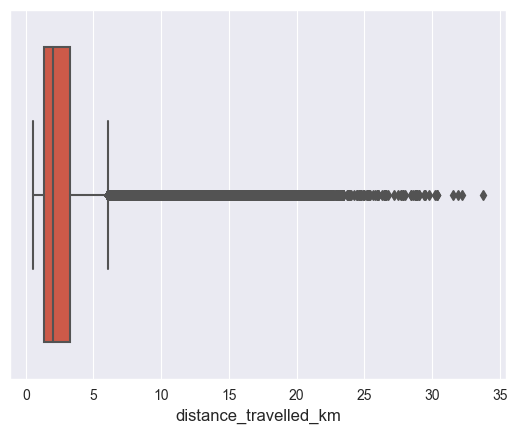

In [10]:
sns.boxplot(data=df_clean,
            x='distance_travelled_km')

plt.show()

In [11]:
# J'ETUDIE CE QUI SE PASSE SUR LES DUREES DE TRAJET EN MINUTES
df_clean.sort_values(by='ride_duration_min', ascending=False)

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
1567820,docked_bike,casual,2021-06-05 02:27:26,2021-07-13 22:51:35,Saturday,Weekend,June,Summer,Michigan Ave & Lake St,Malcolm X College Vaccination Site,One-way trip,41.886024,-87.624117,41.877618,-87.673895,4.225656,3356649.0,55944.150000
664245,docked_bike,casual,2021-05-02 02:56:07,2021-06-08 13:37:43,Sunday,Weekend,May,Spring,State St & Van Buren St,Wells St & Polk St,One-way trip,41.877181,-87.627844,41.872596,-87.633502,0.692373,3235296.0,53921.600000
1682014,docked_bike,casual,2021-07-08 15:13:08,2021-08-06 13:18:39,Thursday,Weekday,July,Summer,Streeter Dr & Grand Ave,Calumet Ave & 33rd St,One-way trip,41.892278,-87.612043,41.834900,-87.617930,6.398741,2498731.0,41645.516667
2499930,docked_bike,casual,2021-08-01 18:53:10,2021-08-30 16:42:20,Sunday,Weekend,August,Summer,Michigan Ave & Jackson Blvd,Daley Center Plaza,One-way trip,41.877850,-87.624080,41.884241,-87.629634,0.846428,2497750.0,41629.166667
1978319,docked_bike,casual,2021-07-10 15:59:21,2021-08-07 22:43:57,Saturday,Weekend,July,Summer,Dusable Harbor,Warren Park East,One-way trip,41.886976,-87.612813,42.004550,-87.680666,14.227136,2443476.0,40724.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838548,classic_bike,member,2021-07-06 06:13:59,2021-07-06 06:19:00,Tuesday,Weekday,July,Summer,Ashland Ave & Blackhawk St,Milwaukee Ave & Wabansia Ave,One-way trip,41.907066,-87.667252,41.912616,-87.681391,1.322795,301.0,5.016667
3204237,electric_bike,casual,2021-09-22 15:41:38,2021-09-22 15:46:39,Wednesday,Weekday,September,Fall,Michigan Ave & Jackson Blvd,Wells St & Polk St,One-way trip,41.877727,-87.624008,41.872353,-87.633233,0.969773,301.0,5.016667
3434233,classic_bike,member,2021-09-27 16:45:57,2021-09-27 16:50:58,Monday,Weekday,September,Fall,Halsted St & Clybourn Ave,Halsted St & Dickens Ave,One-way trip,41.909668,-87.648128,41.919936,-87.648830,1.143226,301.0,5.016667
2766370,classic_bike,casual,2021-08-07 18:41:09,2021-08-07 18:46:10,Saturday,Weekend,August,Summer,State St & Harrison St,Wabash Ave & Roosevelt Rd,One-way trip,41.874053,-87.627716,41.867227,-87.625961,0.772802,301.0,5.016667


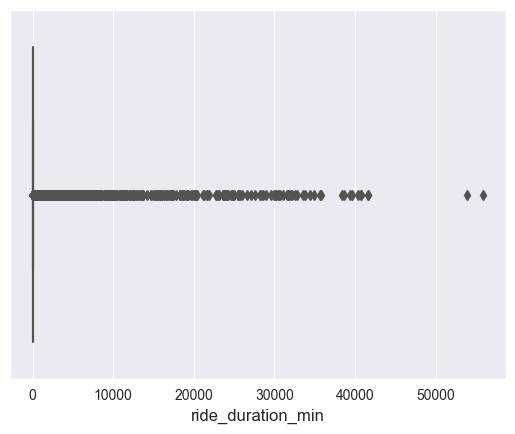

In [13]:
sns.boxplot(data=df_clean,
            x='ride_duration_min')

plt.show()

In [14]:
df_clean['ride_duration_min'].describe().to_frame()

,ride_duration_min
count,3.609357e+06
mean,2.201309e+01
std,1.705394e+02
min,5.016667e+00
25%,8.783333e+00
50%,1.356667e+01
75%,2.246667e+01
max,5.594415e+04


In [15]:
# Je garde les trajets supérieurs à l'heure avec la condition de 6kms parcourus

df_clean[~((df_clean['ride_duration_min'] > 60) & (df_clean['distance_travelled_km'] < 6))]

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
2,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
3,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000
5,electric_bike,member,2021-01-22 15:15:28,2021-01-22 15:36:01,Friday,Weekday,January,Winter,California Ave & Cortez St,Wells St & Elm St,One-way trip,41.900373,-87.696790,41.903272,-87.634457,5.168809,1233.0,20.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528302,classic_bike,casual,2021-12-07 18:05:46,2021-12-07 18:12:18,Tuesday,Weekday,December,Winter,Wells St & Huron St,Wells St & Walton St,One-way trip,41.894722,-87.634362,41.899930,-87.634430,0.579132,392.0,6.533333
4528303,classic_bike,casual,2021-12-01 05:45:55,2021-12-01 05:51:36,Wednesday,Weekday,December,Winter,Wells St & Huron St,Kingsbury St & Kinzie St,One-way trip,41.894722,-87.634362,41.889177,-87.638506,0.705575,341.0,5.683333
4528306,classic_bike,member,2021-12-15 17:33:51,2021-12-15 17:39:14,Wednesday,Weekday,December,Winter,Wilton Ave & Belmont Ave,Clark St & Grace St,One-way trip,41.940180,-87.653040,41.950780,-87.659172,1.283141,323.0,5.383333
4528309,electric_bike,member,2021-12-06 19:37:50,2021-12-06 19:44:51,Monday,Weekday,December,Winter,Canal St & Madison St,Kingsbury St & Kinzie St,One-way trip,41.882123,-87.640053,41.889106,-87.638862,0.782727,421.0,7.016667


In [16]:
df_clean = df_clean[~((df_clean['ride_duration_min'] > 60) & (df_clean['distance_travelled_km'] < 6))]

In [19]:
df_clean = df_clean.sort_values(by='start_time', ascending=True)

df_clean.reset_index(drop=True, inplace=True)

df_clean.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-01 00:02:24,2021-01-01 00:08:39,Friday,Weekday,January,Winter,State St & 33rd St,MLK Jr Dr & 29th St,One-way trip,41.834734,-87.625813,41.842052,-87.617000,1.093249,375.0,6.250000
1,classic_bike,member,2021-01-01 00:06:55,2021-01-01 00:26:36,Friday,Weekday,January,Winter,Lakeview Ave & Fullerton Pkwy,Ritchie Ct & Banks St,One-way trip,41.925858,-87.638973,41.906866,-87.626217,2.360881,1181.0,19.683333
2,electric_bike,member,2021-01-01 00:12:49,2021-01-01 00:43:59,Friday,Weekday,January,Winter,Western Ave & Howard St,Campbell Ave & Fullerton Ave,One-way trip,42.018858,-87.690022,41.924680,-87.689328,10.472291,1870.0,31.166667
3,electric_bike,casual,2021-01-01 00:13:12,2021-01-01 00:33:26,Friday,Weekday,January,Winter,Montrose Harbor,Lakefront Trail & Bryn Mawr Ave,One-way trip,41.963901,-87.638211,41.984012,-87.652338,2.522755,1214.0,20.233333
4,classic_bike,member,2021-01-01 00:14:03,2021-01-01 00:33:22,Friday,Weekday,January,Winter,Montrose Harbor,Lakefront Trail & Bryn Mawr Ave,One-way trip,41.963982,-87.638181,41.984037,-87.652310,2.517371,1159.0,19.316667


In [ ]:
# JE PRENDS LE PARTIE D'ENLEVER LES DUREES SUPERIEURES AU TEMPS MIS POUR FAIRE LA DISTANCE MAXIMALE
df_clean = df_clean[df_clean['ride_duration_min'] < 1300]

Décomposer en variables temporelles         
👉 Bien si des effets spécifiques existent (ex: variations selon l’heure, le jour, le mois, etc.)

1. YEAR : En tant que variable catégorielle (recommandé si tu veux éviter de supposer une relation linéaire entre l'année et ta cible)

In [29]:
# Si effet croissant, on peut l'utiliser comme une variable possédant un facteur ordinal
df_clean['st_year'] = pd.to_datetime(df_clean['start_time']).dt.year

2. MONTH, DAY, HOUR, MINUTE et SECOND suivent une structure cyclique            
   Dans ce cas, ces variables doivent être transformées en coordonnées circulaires (sinus et cosinus) pour capturer cette périodicité   

In [30]:
# TRANSFORMATION CYCLIQUE
# Month
df_clean['month_sin'] = np.sin(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.month / 12)
df_clean['month_cos'] = np.cos(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.month / 12)

# Day of week
df_clean['day_of_week_sin'] = np.sin(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.day_of_week / 7)
df_clean['day_of_week_cos'] = np.cos(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.day_of_week / 7)

# Hour
df_clean['hour_sin'] = np.sin(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.hour / 7)
df_clean['hour_cos'] = np.cos(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.hour / 7)

# Minute
df_clean['minute_sin'] = np.sin(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.minute / 60)
df_clean['minute_cos'] = np.cos(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.minute / 60)

# Second
df_clean['second_sin'] = np.sin(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.second / 60)
df_clean['second_cos'] = np.cos(2 * np.pi * pd.to_datetime(df_clean['start_time']).dt.second / 60)

### Étape 2: Feature Engineering (Choix des variables à conserver)

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3506540 entries, 0 to 3506746
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   bike_type              object 
 1   user_type              object 
 2   start_time             object 
 3   end_time               object 
 4   day_of_week            object 
 5   day_type               object 
 6   month                  object 
 7   season                 object 
 8   start_station_name     object 
 9   end_station_name       object 
 10  route_type             object 
 11  start_lat              float64
 12  start_lng              float64
 13  end_lat                float64
 14  end_lng                float64
 15  distance_travelled_km  float64
 16  ride_duration_s        float64
 17  ride_duration_min      float64
 18  st_year                int32  
 19  month_sin              float64
 20  month_cos              float64
 21  day_of_week_sin        float64
 22  day_of_week_cos        

In [ ]:
# Choix des variables pertinentes
selected_features = ['distance_travelled_km', 'ride_duration_min', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'day_of_week', 'month', 'season', 'user_type', 'bike_type']
df_clean = ?

,distance_travelled_km,ride_duration_min,start_lat,start_lng,end_lat,end_lng,day_of_week,month,season,user_type,bike_type
9,2.032303,7.216667,41.900363,-87.696704,41.899181,-87.672200,Sunday,January,Winter,member,classic_bike
11,2.032911,9.783333,41.900374,-87.696688,41.899180,-87.672178,Saturday,January,Winter,casual,electric_bike
12,2.035544,8.950000,41.900379,-87.696716,41.899149,-87.672177,Saturday,January,Winter,casual,electric_bike
13,2.032303,10.150000,41.900363,-87.696704,41.899181,-87.672200,Sunday,January,Winter,casual,classic_bike
14,5.168809,20.550000,41.900373,-87.696790,41.903272,-87.634457,Friday,January,Winter,member,electric_bike


In [32]:
df_clean.head(2)

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,...,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,minute_sin,minute_cos,second_sin,second_cos
0,classic_bike,member,2021-01-01 00:02:24,2021-01-01 00:08:39,Friday,Weekday,January,Winter,State St & 33rd St,MLK Jr Dr & 29th St,...,0.5,0.866025,-0.433884,-0.900969,0.0,1.0,0.207912,0.978148,0.587785,-0.809017
1,classic_bike,member,2021-01-01 00:06:55,2021-01-01 00:26:36,Friday,Weekday,January,Winter,Lakeview Ave & Fullerton Pkwy,Ritchie Ct & Banks St,...,0.5,0.866025,-0.433884,-0.900969,0.0,1.0,0.587785,0.809017,-0.500000,0.866025


In [ ]:
# CHOIX DES VARIABLES PERTINENTES
selected_features = [
                        'bike_type', 'user_type', 'season', 'route_type', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                        'distance_travelled_km', 'ride_duration_min', 'st_year', 'month_sin', 'month_cos', 'day_of_week_sin',
                        'day_of_week_cos', 'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos', 'second_sin', 'second_cos'
                    ]

### Étape 3: Création des variables X et y ( Sélectionne que les variables numériques)

In [ ]:
# Définition des variables X et y
X = df_clean[selected_features].drop(columns='distance_travelled_km')
y = df_clean['distance_travelled_km']

### Étape 4: Séparer les jeux d'entraînement et les jeux de test (jeu de test à 20% et random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

### Étape 5: Choisir et importer un algorithme de ML (Algorithme de régression linéaire)

In [98]:
# 1. PREPROCESSING
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_preprocessor = StandardScaler()
cat_preprocessor = OneHotEncoder()

# Colonnes numériques
pre_scaler_cols = [
                    'start_lat', 'start_lng', 'end_lat', 'end_lng', 'ride_duration_min', 'month_sin', 'month_cos', 'day_of_week_sin', 
                    'day_of_week_cos', 'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos', 'second_sin', 'second_cos'
                ]

# Colonnes catégorielles
pre_encoder_cols = ['bike_type', 'user_type', 'season', 'route_type', 'st_year']


# 2. COLUMN TRANSFORMER
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
            [
                ("OneHotEncoder", cat_preprocessor, pre_encoder_cols),
                ("StandardScaler", num_preprocessor, pre_scaler_cols),
            ]
        )

# 3. MODELING
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

Model_LR = make_pipeline(
                            preprocessor,
                            LinearRegression()
                    )

Model_LR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  ['bike_type', 'user_type',
                                                   'season', 'route_type',
                                                   'st_year']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['start_lat', 'start_lng',
                                                   'end_lat', 'end_lng',
                                                   'ride_duration_min',
                                                   'month_sin', 'month_cos',
                                                   'day_of_week_sin',
                                                   'day_of_week_cos',
                                                   'hour_sin', 'hour_cos',
                                                   'minute_sin', 'minute_cos',
                                                   'second_sin',
                                                   'second_cos'])])),
                ('linearregression', LinearRegression())])

### Étape 6: Entraînement du modèle

In [99]:
# Entrainement du modèle de régression linéaire
Model_LR.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  ['bike_type', 'user_type',
                                                   'season', 'route_type',
                                                   'st_year']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['start_lat', 'start_lng',
                                                   'end_lat', 'end_lng',
                                                   'ride_duration_min',
                                                   'month_sin', 'month_cos',
                                                   'day_of_week_sin',
                                                   'day_of_week_cos',
                                                   'hour_sin', 'hour_cos',
                                                   'minute_sin', 'minute_cos',
                                                   'second_sin',
                                                   'second_cos'])])),
                ('linearregression', LinearRegression())])

### Étape 7: Effectuez les prédictions sur les données de test

In [60]:
# Prédictions de la durée du trajet en minutes par rapport au jeu de test
y_pred = Model_LR.predict(X_test)

### Étape 8: Evaluez le modèle et intéprétez les résultats

Calculez le coefficient de détermination R² pour le jeu d'entrainement et puis pour le jeu de test

In [61]:
# Correction
r2_train = Model_LR.score(X_train, y_train)
r2_test = Model_LR.score(X_test, y_test)
print(f"R² sur le jeu d'entraînement : {r2_train}")
print(f"R² sur le jeu de test : {r2_test}")

R² sur le jeu d'entraînement : 0.36693243835169576
R² sur le jeu de test : 0.37712724150319


Interprètez les résultats et vérifiez est ce que le modèle à un problème de surajustement(over-fitting) ou sousajustement(under-fitting), commentez votre constatation.

In [ ]:
# Ton intéprétation : R² sur le jeu d'entraînement : 0.367, R² sur le jeu de test : 0.377

# Le modèle est capable d'expliquer 3.67% de la variance des données d'entraînement et 3.77% de la variance des données de test.
# Le modèle n'est pas performant, il est sous-ajusté. Il faudrait explorer d'autres modèles pour améliorer la performance.
# Ces scores sont très faibles et quasiment identiques, ce qui signifie que le modèle ne parvient pas à apprendre ni en entraînement ni en test.
# S’il était en surajustement(over-fitting) ou sousajustement(under-fitting), on verrait un gros écart entre les scores de train et test.

Calculez le R²

In [ ]:
3# R² score
from sklearn.metrics import r2_score

r2_score = r2_score(y_pred=y_pred, y_true=y_test)
print(r2_score)

0.37712724150319


Interprètez cette métrique

In [ ]:
# Ton intéprétation du R² score : Le R² score que j'ai obtenu est 0.377, ce qui est faible.
# Ce qui signifie que le modèle de régression linéaire explique seulement 37,7% de la variance des données cibles.
# Cela veut dire le modèle est faible, et qu'il ne parvient pas bien à capturer les relations entre les variables explicatives et la cible.

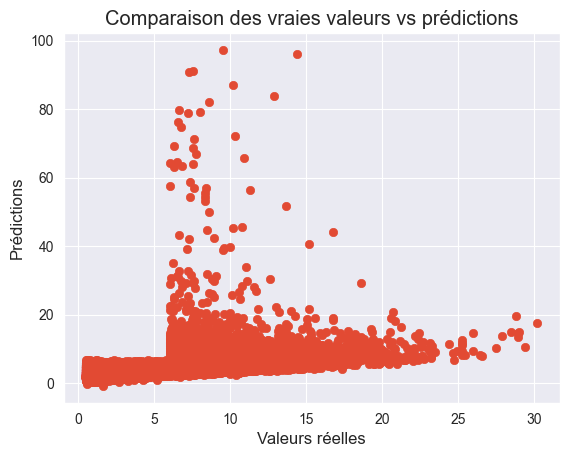

In [64]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison des vraies valeurs vs prédictions")
plt.show()


In [ ]:
df_test = pd.Series(y_test)
df_test.reset_index(drop=True, inplace=True)

pd.concat([df_test, pd.Series(y_pred)], axis=1).rename(columns={'distance_travelled_km' : 'real_values', 0 : 'predicted_values'})

,real_values,predicted_values
0,7.996790,4.398801
1,2.781014,2.405714
2,1.244499,1.913391
3,0.837334,1.820539
4,0.615569,1.736938
...,...,...
701303,2.859598,2.311012
701304,1.091193,1.861372
701305,5.630112,4.462792
701306,1.387374,2.208161


Calculez la Moyenne des écarts absolus au carré (Mean Squared Error (MSE)) et faites la racine du résultat, que pouvez vous intépréter de ce résultat ?

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

mse = mean_squared_error(y_test, y_pred)

print("Moyenne des écarts absolus au carré (Mean Squared Error (MSE)):", mse)

Moyenne des écarts absolus au carré (Mean Squared Error (MSE)): 2.1746857917031575


In [86]:
print("Moyenne des écarts absolus :", np.mean(np.abs(y_pred - y_test)))


Moyenne des écarts absolus : 0.9607142485660997


Votre intéprétation :

In [ ]:
# ?

Calculez la corrélation entre `distance_travelled_km` et les autres variables

In [ ]:
# Correction
correlation_matrix = ?


distance_travelled_km    1.000000
end_lat                  0.099870
start_lat                0.090138
ride_duration_min        0.033049
start_lng               -0.082416
end_lng                 -0.091259
Name: distance_travelled_km, dtype: float64

In [93]:
df_clean.select_dtypes(include='number').corr()['distance_travelled_km'].sort_values(ascending=False).to_frame()

,distance_travelled_km
distance_travelled_km,1.000000
ride_duration_s,0.574058
ride_duration_min,0.574058
end_lat,0.091436
start_lat,0.081040
hour_sin,0.012216
day_of_week_cos,0.012168
minute_sin,0.006711
month_sin,0.003442
second_sin,0.000555


Pouvez-vous expliquer la faible performance en regardant les corrélations entre la variable `distance_travelled_km` et les autres variables

In [ ]:
# Votre interprétation : Les variables explicatives sont très peu corrélées avec la variable cible 'distance_travelled_km'.

### **HORS CERTIFICATION ( ⚠⚠ Executer le code après avoir fini tout l'examen blanc ⚠⚠)**

Ceci n'est pas inclus dans le programme de la certification mais vous permet de comprendre coment résoudre la performance de votre modèle de régression linéaire




La solution serait de choisir un autre modèle qui serait plus puissant à gérer les problématiques de non linéarité des variables et qui pourrait mieux capturer les relations.
On a pris comme exemple le `RandomForestRegressor`, il devrait prendre autour de 2 mins selon les performances de votre machine.

In [94]:
from sklearn.ensemble import RandomForestRegressor

X_rf = df_clean.select_dtypes(include='number').drop(columns='distance_travelled_km')
y_rf = df_clean['distance_travelled_km']

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, random_state=42, train_size=0.8)

# Création du modèle avec des hyperparamètres optimisés
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)

# Entraînement du modèle
model.fit(X_rf_train, y_rf_train)

# Évaluation du modèle sur le jeu de test
r2_score_test = model.score(X_rf_test, y_rf_test)

print(f"R² avec Random Forest : {r2_score_test:.4f}")

R² avec Random Forest : 0.8394


### Étape 9: Expliquer et vulgariser le principe de l'algorithme ML

Votre explication :

?

In [ ]:
# La fonction de la droite de régression est : y = ax + b où y est la variable cible, x est la variable explicative, a est le coefficient de la variable explicative et b est l'ordonnée à l'origine.

# a: Le coefficient de la variable explicative est la pente de la droite de régression. Il indique l'impact de la variable explicative sur la variable cible.
# Plus le coefficient de la variable explicative est grand, plus la variable explicative a un impact sur la variable cible.

# b: L'ordonnée à l'origine est la valeur de la variable cible lorsque la variable explicative est nulle. Il peut représenter l'erreur de mesure ou le biais du modèle.
# Plus l'ordonnée à l'origine est grande, plus la variable cible a une valeur de base élevée.

### Étape 10: Les limites et les biais des méthodes utilisées en ML

Expliquez ces problématiques ML :

**Underfitting** : Lorsque le modèle est trop simple pour capturer les tendances des données.

**Overfitting** : Lorsque le modèle apprend trop bien les détails des données d'entraînement, mais échoue à généraliser.

Comment peut-on optimiser les modèles ?

**Optimisation** : Peut être améliorée en ajustant les hyperparamètres et en testant différents modèles.

## 2. Classification : Régression Logistique
Entraînez un modèle de régression logistique pour classifier le type de l'utilisateur (la variable `user_type`).

## Charger les données
Chargez le fichier CSV depuis l'URL publique et affichez les premières lignes.

In [103]:
# Correction
file_url = "https://storage.googleapis.com/dataset-storage-chicago-cyclist-csv/cyclistic_clean.csv"
chunk_size = 500000  # Nombre de lignes par chunk
chunks = pd.read_csv(file_url, chunksize=chunk_size)

df_list = []
for chunk in chunks: # Ex. filtrer les trajets avec distance > 0
    df_list.append(chunk)

df_clean = pd.concat(df_list, ignore_index=True)
df_clean.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
1,electric_bike,member,2021-01-23 12:57:38,2021-01-23 13:02:10,Saturday,Weekend,January,Winter,California Ave & Cortez St,California Ave & North Ave,One-way trip,41.900406,-87.696733,41.910435,-87.696890,1.115287,272.0,4.533333
2,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
3,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000


In [104]:
# Faisons une copie du DataFrame
df_class = df_clean.copy()

### Étape 1: Sélection de lignes de dataframe par condition (Les trajets d'une durée de plus de 10 minutes)

In [105]:
# Exemple : Sélection des trajets de plus de 10 minutes
df_class = df_class[df_class['ride_duration_min'] > 10]

df_class.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000
5,electric_bike,member,2021-01-22 15:15:28,2021-01-22 15:36:01,Friday,Weekday,January,Winter,California Ave & Cortez St,Wells St & Elm St,One-way trip,41.900373,-87.696790,41.903272,-87.634457,5.168809,1233.0,20.550000
8,electric_bike,member,2021-01-27 07:27:09,2021-01-27 07:45:32,Wednesday,Weekday,January,Winter,California Ave & Cortez St,Damen Ave & Clybourn Ave,One-way trip,41.900313,-87.696792,41.931841,-87.677814,3.841371,1103.0,18.383333
9,electric_bike,member,2021-01-15 08:54:41,2021-01-15 09:11:46,Friday,Weekday,January,Winter,California Ave & Cortez St,Damen Ave & Clybourn Ave,One-way trip,41.900356,-87.696627,41.931922,-87.677856,3.838230,1025.0,17.083333
14,classic_bike,casual,2021-01-22 21:54:15,2021-01-22 22:04:27,Friday,Weekday,January,Winter,California Ave & Cortez St,Honore St & Division St,One-way trip,41.900363,-87.696704,41.903119,-87.673935,1.909151,612.0,10.200000


### Étape 2: Feature Engineering (Choix des variables à conserver)

Gardez que ces colonnes dans votre dataframe :

`['distance_travelled_km', 'ride_duration_min', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'month', 'season', 'user_type', 'bike_type']`


In [106]:
# Choix des variables pertinentes
selected_features = ['distance_travelled_km', 'ride_duration_min', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'month', 'season', 'user_type', 'bike_type']

df_class = df_class[selected_features]

df_class.head()

,distance_travelled_km,ride_duration_min,start_lat,start_lng,end_lat,end_lng,month,season,user_type,bike_type
4,2.032303,10.150000,41.900363,-87.696704,41.899181,-87.672200,January,Winter,casual,classic_bike
5,5.168809,20.550000,41.900373,-87.696790,41.903272,-87.634457,January,Winter,member,electric_bike
8,3.841371,18.383333,41.900313,-87.696792,41.931841,-87.677814,January,Winter,member,electric_bike
9,3.838230,17.083333,41.900356,-87.696627,41.931922,-87.677856,January,Winter,member,electric_bike
14,1.909151,10.200000,41.900363,-87.696704,41.903119,-87.673935,January,Winter,casual,classic_bike


### Étape 3: Création des variables X et y ( Sélectionne que les variables numériques)

Encodez les variables `user_type` et `bike_type` en variables binaires

(Indice : valeur = 0 ou 1 | `factorize()` ou `labelEncoder()`)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Liste pour l'encodage
pre_label_cols = ['user_type', 'bike_type']

Encodez les variables `month` et `season` en transformant les catégories en colonnes binaires

(Indice : chaque valeur = colonne | `getdummies()` ou `OneHotEncoder()`)

In [109]:
from sklearn.preprocessing import OneHotEncoder

# Mettre les deux colonnes en catégorie
df_class['month'] = df_class['month'].astype('category')
df_class['season'] = df_class['season'].astype('category')

# Liste pour l'encodage
pre_encoder_cols = ['month', 'season']

Création des variables explicatives (Toutes les variables) X et de la variable expliquée y

In [108]:
# Définition des variables X et y
X_class = df_class.drop(columns=["user_type"])
y_class = df_class["user_type"]

### Étape 4: Séparer les jeux d'entraînement et les jeux de test (jeu de test à 20% et random_state = 42)

In [110]:
from sklearn.model_selection import train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

### Étape 5: Choisir et importer un algorithme de ML (Algorithme de classification de ton choix)

In [ ]:
# Définition des variables X et y
X_class = df_class.drop(columns=["user_type"])
y_class = df_class["user_type"]

from sklearn.model_selection import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# 1. PREPROCESSING
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import FunctionTransformer

# LabelEncoder ne peut pas être utilisé directement dans un ColumnTransformer, car il n'a pas de méthode transform() qui retourne un array 2D (une seule colonne à la fois).
# Fonction pour appliquer LabelEncoder à une seule colonne et la convertir en 2D
def label_encode_column(col):
    return LabelEncoder().fit_transform(col.squeeze()).reshape(-1, 1) 

label_preprocessor = FunctionTransformer(label_encode_column, validate=False)
cat_preprocessor =OneHotEncoder(drop="first", sparse_output=False)

# Colonnes à labelliser
pre_label_cols = ['bike_type']

# Colonnes catégorielles
pre_encoder_cols = ['month', 'season']

# Colonnes sans traitement
pre_passthrough_cols = ['distance_travelled_km', 'ride_duration_min', 'start_lat', 'start_lng', 'end_lat', 'end_lng']


# 2. COLUMN TRANSFORMER
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
            [
                ("OneHotEncoder", cat_preprocessor, pre_encoder_cols),
                ("LabelEncoder", label_preprocessor, pre_label_cols),
                ("passthrough", "passthrough", pre_passthrough_cols)
            ]
        )

# 3. MODELING
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

Model_LogReg = make_pipeline(
                            preprocessor,
                            LogisticRegression()
                    )

Model_LogReg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['month', 'season']),
                                                 ('LabelEncoder',
                                                  FunctionTransformer(func=<function label_encode_column at 0x00000197116E5F80>),
                                                  ['bike_type']),
                                                 ('passthrough', 'passthrough',
                                                  ['distance_travelled_km',
                                                   'ride_duration_min',
                                                   'start_lat', 'start_lng',
                                                   'end_lat', 'end_lng'])])),
                ('logisticregression', LogisticRegression())])

### Étape 6: Entraînement du modèle

In [134]:
# Entrainement du modèle de régression linéaire
Model_LogReg.fit(X_train_class, y_train_class)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['month', 'season']),
                                                 ('LabelEncoder',
                                                  FunctionTransformer(func=<function label_encode_column at 0x00000197116E5F80>),
                                                  ['bike_type']),
                                                 ('passthrough', 'passthrough',
                                                  ['distance_travelled_km',
                                                   'ride_duration_min',
                                                   'start_lat', 'start_lng',
                                                   'end_lat', 'end_lng'])])),
                ('logisticregression', LogisticRegression())])

### Étape 7: Effectuez les prédictions sur les données de test

In [135]:
# Prédictions de la durée du trajet en minutes par rapport en se basant sur les données du test
y_pred_class = Model_LogReg.predict(X_test_class)

### Étape 8: Evaluez le modèle et intéprétez les résultats

Calculez le accuracy_score

In [136]:
# accuracy score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true=y_test_class, y_pred=y_pred_class)

print(f"Précision : {accuracy}")

Précision : 0.6707954009314895


In [137]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

      casual       0.70      0.69      0.70    298438
      member       0.63      0.65      0.64    246281

    accuracy                           0.67    544719
   macro avg       0.67      0.67      0.67    544719
weighted avg       0.67      0.67      0.67    544719



Interprètez ces résultats

In [ ]:
# Le modèle de régression logistique a une précision de 0.67, ce qui signifie qu'il prédit correctement 67% des valeurs.
# Le modèle a une précision de 0.70 pour la classe 0 et 0.63 pour la classe 1. cela signifie que le modèle PREDIT mieux la classe 0 que la classe 1.
# Le modèle a un rappel de 0.70 pour la classe 0 et 0.63 pour la classe 1. cela signifie que le modèle IDENTIFIE mieux la classe 0 que la classe 1.
# Le modèle a un f1-score de 0.70 pour la classe 0 et 0.64 pour la classe 1. cela signifie que le modèle a une légère meilleure précision pour la classe 0 que pour la classe 1.
# Le modèle a un support de 298438 pour la classe 0 et 246281 pour la classe 1. cela signifie que le modèle a plus de données pour la classe 0 que pour la classe 1.

### Étape 9: Expliquer et vulgariser le principe d'un algorithme ML de classification (Exemple du KNN)

Votre explication :

In [ ]:
# Le KNN est un algorithme d'apprentissage supervisé qui peut être utilisé pour la classification et la régression.
# Il est basé sur la similarité entre les données. Il calcule la distance entre les points de données et trouve les k points les plus proches.
# Il attribue une étiquette à un point de données en fonction de la majorité des k points les plus proches.